In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [20]:
results_path = os.path.join("../weights/", "per-class-acc-test-best-epoch=19-val_acc=0.9493-test_acc=0.9447.csv")
ann_path = "train.csv"

In [21]:
results = pd.read_csv(results_path, index_col=0)
anns = pd.read_csv(ann_path, header=None)

In [22]:
results

,acc,n
0,0.913043,46
1,0.600000,5
2,0.851852,27
3,0.913043,23
4,1.000000,6
...,...,...
3258,1.000000,5
3259,0.800000,5
3260,1.000000,5
3261,0.714286,7


In [5]:
train_n = anns.groupby(by=0).agg("count")
train_n

,1
0,
0,157
1,14
2,91
3,79
4,18
...,...
3258,14
3259,14
3260,15


In [24]:
results["train_n"] = train_n

In [25]:
results

,acc,n,train_n
0,0.913043,46,157
1,0.600000,5,14
2,0.851852,27,91
3,0.913043,23,79
4,1.000000,6,18
...,...,...,...
3258,1.000000,5,14
3259,0.800000,5,14
3260,1.000000,5,15
3261,0.714286,7,21


In [35]:
results_grouped = results.groupby(by="train_n").agg("mean")
results_grouped

,acc,n
train_n,,
14,0.780822,5.0
15,0.823009,5.0
16,0.852747,5.0
17,0.830928,5.0
18,0.839120,6.0
...,...,...
2429,0.966906,695.0
2430,0.978417,695.0
2662,0.961892,761.0


In [40]:
sorted_accs = sorted(list(zip(results_grouped.index.tolist(), results_grouped["acc"].tolist())), key=lambda x: x[0])


In [47]:
n, acc = list(zip(*sorted_accs))

(0.7808219256330299,
 0.8230088576015118,
 0.852747258576718,
 0.8309278419030082,
 0.8391203673349487,
 0.8769230705041152,
 0.7988505733424219,
 0.8409703576339865,
 0.8649350708181208,
 0.8690476254732521,
 0.8808139534883721,
 0.8705357142857143,
 0.8713235294117647,
 0.8819444444444444,
 0.8804500768833523,
 0.8833333402872086,
 0.8721461259338954,
 0.9157088162570164,
 0.8745762655290507,
 0.918518516752455,
 0.9064516021359351,
 0.9146341507027789,
 0.8877005436841179,
 0.8987013076032911,
 0.8541666679084301,
 0.9232456182178698,
 0.8529411799767438,
 0.90277777860562,
 0.9080675469665993,
 0.910256415605545,
 0.874125880725456,
 0.9120878989879901,
 0.9055299489728866,
 0.8928571380674839,
 0.8928571293751398,
 0.9155555605888367,
 0.9066666722297668,
 0.8906666731834412,
 0.8035714285714286,
 0.9427083333333334,
 0.94140625,
 0.9375,
 0.8844537873353276,
 0.9176470637321472,
 0.8917647111415863,
 0.9495798349380493,
 0.8864734250566234,
 0.9523809381893703,
 0.898989899591966

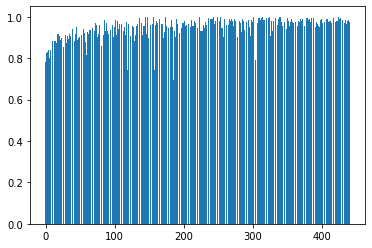

In [54]:
plt.bar(list(range(len(acc))), acc)
plt.show()